In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Dropout, MaxPool1D, ReLU, Flatten

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
samples_per_class = 5000
no_of_classes = 2

In [4]:
noise_df = pd.read_csv("/content/gdrive/MyDrive/GW_SOP/Code/debugging/Test 3/data/Final_Merged_Noise_Reduced_No_Abs.csv", header=None)
noise = noise_df.values.astype(float)
noise = np.repeat(noise, 5000, 0)


data_BBH_df = pd.read_csv("/content/gdrive/MyDrive/GW_SOP/Code/debugging/Test 3/data/Final_BBH_Merged_Noise_Signal.csv", header=None)
data_BBH = data_BBH_df.values.astype(float)
data_BBH = np.repeat(data_BBH, 5000, 0)

In [41]:
X = np.concatenate((noise, data_BBH), axis=0)

print(len(noise_df.index))
print(X)
print(X.shape)

1
[[-1.39104370e-20  5.91631903e-20 -1.19170211e-19 ... -4.66268078e-20
   1.70531412e-19 -5.08519073e-20]
 [-1.39104370e-20  5.91631903e-20 -1.19170211e-19 ... -4.66268078e-20
   1.70531412e-19 -5.08519073e-20]
 [-1.39104370e-20  5.91631903e-20 -1.19170211e-19 ... -4.66268078e-20
   1.70531412e-19 -5.08519073e-20]
 ...
 [ 6.35928269e-20  1.13236541e-19  3.30965286e-20 ...  4.70233125e-20
   1.11122515e-19  3.90177575e-20]
 [ 6.35928269e-20  1.13236541e-19  3.30965286e-20 ...  4.70233125e-20
   1.11122515e-19  3.90177575e-20]
 [ 6.35928269e-20  1.13236541e-19  3.30965286e-20 ...  4.70233125e-20
   1.11122515e-19  3.90177575e-20]]
(10000, 16384)


In [42]:
# Alternate way of creating y for the dataset
 
y = [int(i/samples_per_class) for i in range(samples_per_class*no_of_classes)]
y = tf.keras.utils.to_categorical(y)
print(y)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [43]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# print(X)

X *= 1e19
print(X)

Z = np.zeros((2, 16384))
Z[0] = X[0]
Z[1] = X[5010]
print(Z)

np.savetxt("/content/gdrive/MyDrive/GW_SOP/Code/debugging/Test 3/trial_3_noise.txt", Z[0])
np.savetxt("/content/gdrive/MyDrive/GW_SOP/Code/debugging/Test 3/trial_3_merged.txt", Z[1])

print(X[0, 501])
print(X[5010, 499])

[[-0.13910437  0.5916319  -1.19170211 ... -0.46626808  1.70531412
  -0.50851907]
 [-0.13910437  0.5916319  -1.19170211 ... -0.46626808  1.70531412
  -0.50851907]
 [-0.13910437  0.5916319  -1.19170211 ... -0.46626808  1.70531412
  -0.50851907]
 ...
 [ 0.63592827  1.13236541  0.33096529 ...  0.47023313  1.11122515
   0.39017758]
 [ 0.63592827  1.13236541  0.33096529 ...  0.47023313  1.11122515
   0.39017758]
 [ 0.63592827  1.13236541  0.33096529 ...  0.47023313  1.11122515
   0.39017758]]


In [44]:
X = np.expand_dims(X, axis=-1)
print(X.shape)
print(X)

(10000, 16384, 1)
[[[-0.13910437]
  [ 0.5916319 ]
  [-1.19170211]
  ...
  [-0.46626808]
  [ 1.70531412]
  [-0.50851907]]

 [[-0.13910437]
  [ 0.5916319 ]
  [-1.19170211]
  ...
  [-0.46626808]
  [ 1.70531412]
  [-0.50851907]]

 [[-0.13910437]
  [ 0.5916319 ]
  [-1.19170211]
  ...
  [-0.46626808]
  [ 1.70531412]
  [-0.50851907]]

 ...

 [[ 0.63592827]
  [ 1.13236541]
  [ 0.33096529]
  ...
  [ 0.47023313]
  [ 1.11122515]
  [ 0.39017758]]

 [[ 0.63592827]
  [ 1.13236541]
  [ 0.33096529]
  ...
  [ 0.47023313]
  [ 1.11122515]
  [ 0.39017758]]

 [[ 0.63592827]
  [ 1.13236541]
  [ 0.33096529]
  ...
  [ 0.47023313]
  [ 1.11122515]
  [ 0.39017758]]]


In [45]:
X_train, _, y_train, _ = train_test_split(X, y, test_size=1) #, random_state=1

In [46]:
print(X_train.shape, y_train.shape)

(9999, 16384, 1) (9999, 2)


In [47]:
model = Sequential()

model.add(Conv1D(16, 16, input_shape = (16384,1)))
model.add(MaxPool1D(4, 4))
model.add(ReLU())
model.add(Conv1D(32, 8))
model.add(MaxPool1D(4, 4))
model.add(ReLU())
model.add(Conv1D(64, 8))
model.add(MaxPool1D(4, 4))
model.add(ReLU())
model.add(Conv1D(128, 8))
model.add(MaxPool1D(4, 4))
model.add(ReLU())
model.add(Flatten())
model.add(Dense(7808))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
history = model.fit(X_train, y_train, batch_size=128, epochs=2) # tf.nn.sigmoid_cross_entropy_with_logits

Epoch 1/2
79/79 [==============================] - 7s 66ms/step - loss: 0.1612 - accuracy: 0.9684
Epoch 2/2
79/79 [==============================] - 5s 65ms/step - loss: 1.9177e-12 - accuracy: 1.0000


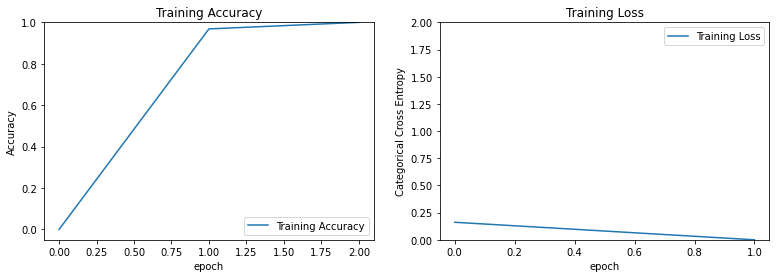

In [49]:
acc = [0.] + history.history['accuracy']

loss = history.history['loss']

plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training Accuracy')
plt.xlabel('epoch')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.legend(loc='upper right')
plt.ylabel('Categorical Cross Entropy')
plt.ylim([0,2])
plt.title('Training Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# model.save("/content/gdrive/MyDrive/GW_SOP/Code/debugging/Trial 1/data/weights_trial_3.h5")